In [29]:
from collections import defaultdict
import random
import numpy as np

In [30]:
# preprocess the text to keep only alphabets and lowercase
def preprocess_text(file_path):
    with open(file_path, 'r') as file:
        text = file.read().lower()
    alpha_text = ''.join([c for c in text if c.isalpha()])
    return alpha_text


##### 2a Generate Equiprobable words

In [31]:
def generate_equiprobable_words(num_words=100, word_length=4):
    words = [''.join(random.choice('abcdefghijklmnopqrstuvwxyz') for _ in range(word_length)) for _ in range(num_words)]
    return words

##### 2b: Estimate Letter Probabilities using given file texts

In [32]:
def estimate_letter_probabilities(text):
    letter_counts = defaultdict(int)
    for letter in text:
        letter_counts[letter] += 1
    total_count = sum(letter_counts.values())
    probabilities = {letter: count / total_count for letter, count in letter_counts.items()}
    return probabilities

# 2b: Generate words with probability based on the file text probability mass function
def generate_words_using_pmf(probabilities, num_words=100, word_length=4):
    letters = list(probabilities.keys())
    probs = list(probabilities.values())
    words = [''.join(np.random.choice(letters, p=probs) for _ in range(word_length)) for _ in range(num_words)]
    return words

##### Format words as required

In [33]:
def format_words(words):
    for i in range(0, len(words), 10):
        print(' '.join(words[i:i+10]))

In [34]:
text_spamiam = preprocess_text('spamiam.txt')

# Part 2a: Generate words equiprobable letters
words_equiprobable = generate_equiprobable_words()
print("Equiprobable Words:")
format_words(words_equiprobable)
print("\n")

# Part 2b: Generate words using estimated letter probabilities
letter_probs = estimate_letter_probabilities(text_spamiam)
words_pmf = generate_words_using_pmf(letter_probs)
print("Words Using PMF:")
format_words(words_pmf)
print("\n")

Equiprobable Words:
gbbm dhva ofdz tjns kjna dmht bwqi ogka hree esnc
iayo syjc ttdj jlqa rgfp skrg oizc vbkv auzy xlxr
udtj steh jqax klbz wutp aglu dinm pblv rjac arun
edfv ovqn xlef lebi iezb gwkm kufw lgaq rxaz tfti
vzbf xktv ckbc fwmv biks fmjk uyoh gxlo tuit dqra
ajss lulq egkj bmin mtea evab qsny dstg dyop eagm
vovw jwvh pnvj eaih hnfa lzbz fmbt ojez qqoj bnyn
amrb wzcb xyqe ezxr dkny tohc wnis xxyq vbar bomy
jtxd qwpa mncz azew rqak zjdp yoju rteu vflh oeqh
huql rsra sdyc qsnv zarn idod coad pimm fmny vytd


Words Using PMF:
cawi evht usoe uyin nuem rtwb mlih mtee repu dhod
hkmc ukai imrl ntwt iiad yeno erii uwmh oihi etdo
inst oisy eago ogyo ywon gero wdia ehoe rofw liiu
teri olur ewit hfnw nolo oioc mott uuie ndyk uect
etye osti hulh tntt rywl klnt nlfn tero aitt olek
tndt lhnt algw nimy rttn eamd itaw aetn thig siau
wari ketu dyrn oinl iudn enei mkhr hiey mfsy rood
edim edni lkol rtim nhmc twwi nelu otot pttt rlci
tenl euoo teco ithe ymiv uote eoey hray nhtf epiy
nyot erii o

##### Part 2c: Estimate transition probabilities using letters inside the word, not the adjustent and Generate words

In [35]:
def preprocess_text_with_spaces(file_path):
    with open(file_path, 'r') as file:
        text = file.read().lower()
    
    # Replace non-alphabetic characters with a space
    alpha_text = ''.join([c if c.isalpha() else ' ' for c in text])
    
    # Replace multiple spaces with a single space to ensure consistent word separation
    alpha_text = ' '.join(alpha_text.split())
    
    return alpha_text

In [36]:
def estimate_transition_probabilities_2c(text):
    transition_counts = defaultdict(lambda: defaultdict(int))

    # Split the text into words
    words = text.split(' ')
    
    # Calculate transition within each word
    for word in words:
        for i in range(len(word) - 1):
            transition_counts[word[i]][word[i + 1]] += 1
    
    # Get transition probabilities
    transition_probs = {}
    for x_n, transitions in transition_counts.items():
        total = sum(transitions.values())
        transition_probs[x_n] = {x_n1: count / total for x_n1, count in transitions.items()}
    
    return transition_probs

def generate_words_2c(transition_probs, start_probs, num_words=100, word_length=4):
    words = []
    letters = list(start_probs.keys())
    start_probs_list = list(start_probs.values())

    for _ in range(num_words):
        word = [np.random.choice(letters, p=start_probs_list)]
        for _ in range(word_length - 1):
            if word[-1] in transition_probs:
                next_letter = np.random.choice(
                    list(transition_probs[word[-1]].keys()), 
                    p=list(transition_probs[word[-1]].values())
                )
                word.append(next_letter)
            else:
                # if transition does not exists
                word.append(np.random.choice(letters, p=start_probs_list))
        words.append(''.join(word))
    return words

##### Results with spamiam.txt

In [37]:
text_spamiam = preprocess_text('spamiam.txt')

# Part 2c: Generate words
transition_probs_2c = estimate_transition_probabilities_2c(text_spamiam)
words_2c = generate_words_2c(transition_probs_2c, letter_probs)
print("Words for problem 2c:")
format_words(words_2c)
print("\n")

Words for problem 2c:
nthe eoul otld thur lado coul onot onea tare ildd
thid kere tlik toin mita ewon ouar tyit eano roun
emar ncha otch reir trew erei memi amys wona myoe
sfik ldon wama woud ikey thil llit nomi your tams
iwhe wore dnot mywa youl onto eano iado enot mwot
enou wild atha your eine coul enot ernn iali otai
erid intm eeiw herk ilil mabu chno afiw icra yono
ouli itta miwo llik kyre ldoi amts iwin rouy eikh
tamd wono evev keyw eeyr kenu otbu isei reyo demi
noth dnul leiw ouli iwou emis ryot eidn nthe uldo




##### Part 2d: Estimate transition probabilities and generate words

In [38]:
def estimate_transition_probabilities_2d(text):
    transition_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

    # Split the text into words
    words = text.split(' ')

    # Calculate transition probabilities within each word
    for word in words:
        for i in range(len(word) - 2):
            x_n1 = word[i]
            x_n = word[i + 1]
            x_n_plus_1 = word[i + 2]
            transition_counts[x_n1][x_n][x_n_plus_1] += 1
    
    # Normalize counts to get probabilities
    transition_probs = defaultdict(lambda: defaultdict(dict))
    for x_n1 in transition_counts:
        for x_n in transition_counts[x_n1]:
            total_count = sum(transition_counts[x_n1][x_n].values())
            transition_probs[x_n1][x_n] = {x_n_plus_1: count / total_count for x_n_plus_1, count in transition_counts[x_n1][x_n].items()}
    
    return transition_probs


In [39]:
def generate_words_2d(transition_probs, start_probs, num_words=100, word_length=4):
    words = []
    letters = list(start_probs.keys())
    start_probs_list = list(start_probs.values())

    for _ in range(num_words):
        # Start with a pair of letters
        first_letter = np.random.choice(letters, p=start_probs_list)
        second_letter = np.random.choice(letters, p=start_probs_list)
        word = [first_letter, second_letter]

        # Generate the remaining letters based on second-order transitions
        for _ in range(word_length - 2):
            prev2 = word[-2]
            prev1 = word[-1]
            if prev1 in transition_probs[prev2]:
                next_letter_choices = list(transition_probs[prev2][prev1].keys())
                next_letter_probs = list(transition_probs[prev2][prev1].values())
                if next_letter_choices:  # Ensure there are valid transitions
                    next_letter = np.random.choice(next_letter_choices, p=next_letter_probs)
                    word.append(next_letter)
                else:
                    # Fallback to first-order probabilities if no valid transition is found
                    word.append(np.random.choice(letters, p=start_probs_list))
            else:
                # Fallback to first-order probabilities if no valid transition is found
                word.append(np.random.choice(letters, p=start_probs_list))
        
        words.append(''.join(word))

    return words

In [40]:
# Part 2d: Generate words using 2d
transition_probs_2d = estimate_transition_probabilities_2d(text_spamiam)
words_2d= generate_words_2d(transition_probs_2d, letter_probs)
print("Words Using 2d:")
format_words(words_2d)


Words Using 2d:
teve tryo eema prud newd remy yhab oozi aemy odei
atmy ispn tevi athe fwdn urno ctan dmwo mafa auso
uiei akey amsa ithi psle erea onal ywhe couc woul
oevi anyw nits deit ehou erei tpme fort iids like
love toyo illi iykt init olgh olhu hour oiha ting
nsom whee ible iomt koyo wenu yram oozi imhe dram
eort esat looz nthe wcso rthe ehil edei roma pido
ould enud alln krom oozi illn tlik ebei swee mlet
oiha hoes outh nits onot hoev dawa ufro wnrs wher
otli oeve eona deit dtat wlly rhat ktev aewd elre


#####  Repeat parts 2b-2d using the le saki story.txt 

In [41]:
text_sakistory = preprocess_text('saki_story.txt')

# Part 2e: Generate words using estimated letter probabilities
letter_probs = estimate_letter_probabilities(text_sakistory)
words_2e_pmf = generate_words_using_pmf(letter_probs)
print("Words Using PMF:")
format_words(words_2e_pmf)
print("\n")

text_sakistory = preprocess_text('saki_story.txt')

# Part 2c: Generate words
transition_probs_2e_2c = estimate_transition_probabilities_2c(text_sakistory)
words_2e_2c = generate_words_2c(transition_probs_2e_2c, letter_probs)
print("Words for problem 2c:")
format_words(words_2e_2c)
print("\n")

# Part 2d: Generate words using 2d
transition_probs_2e_2d = estimate_transition_probabilities_2d(text_sakistory)
words_2e_2d= generate_words_2d(transition_probs_2e_2d, letter_probs)
print("Words Using 2d:")
format_words(words_2e_2d)

Words Using PMF:
opoe snit seik bids ebpf ttlb hrea twms lsah etau
tanr yzga aepe khok fesy hcbh hobt iprt igit ovse
aatc sepp heco hinh tdio lwhn lehe dicr coec neeh
toeh neti nevo ehwe erlt itoo huri horw rrow assr
owug oage nehi edat ilsp hrss ardu hhxe eeyy elfr
ulsr envo dnnr taes shor elro rrfa fpse vnim shne
eeao nudv bvre dcyl rins lggs taeh lpoi rrhw aaag
rohd avhe nnul nrce haaa eehy tiwr rdsh afoe aitg
arbn ttte ogsl eiwf lsst tndh uoee lrce cotr ieuo
loat lstn lrus dona isae tfln ctnm nodf dieb wilv


Words for problem 2c:
rern mwel esho fmts dceg tdth altm sine tara ndac
viro wher eane haif then thet nono ogby ybag eror
nwst tong ndtw itof sala onid wlen llid lfth thor
inar hera arco shat epld eshe inou ngth como ittt
eara yyyh sarn thef issh besu outi edar tham fcbr
toth nbun mats ompt rral ebla whew edch owdn ther
hena ofas iout ioms dbow anwa sous mitr medf avot
stho ceni isst itse hmat eser anon wand ithi rdwe
tthe dare cine nidi ance ghar thut rsew thrn inte
ndei veot

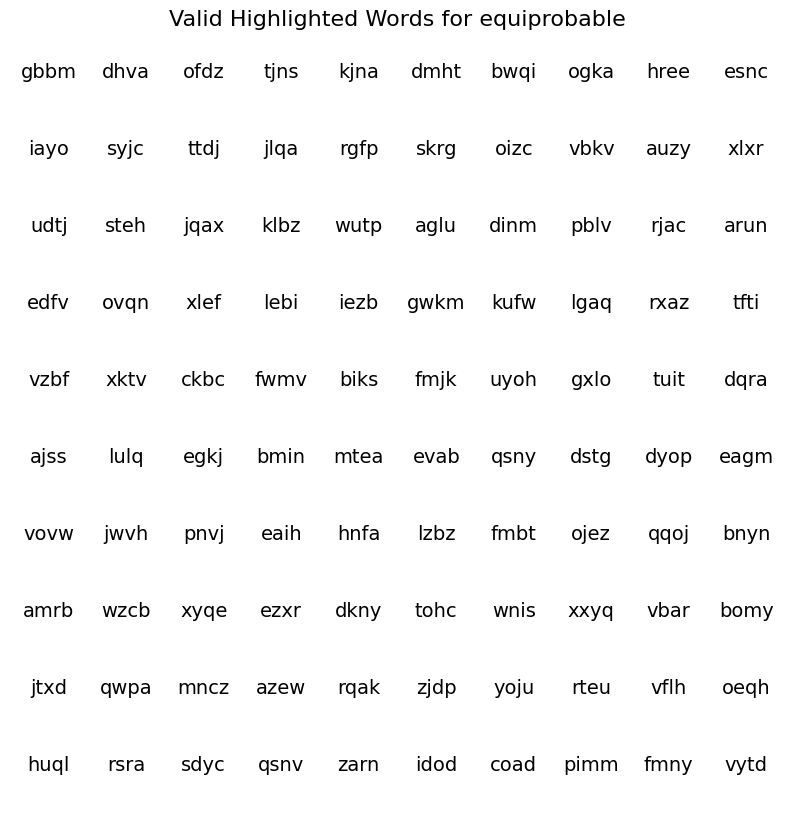

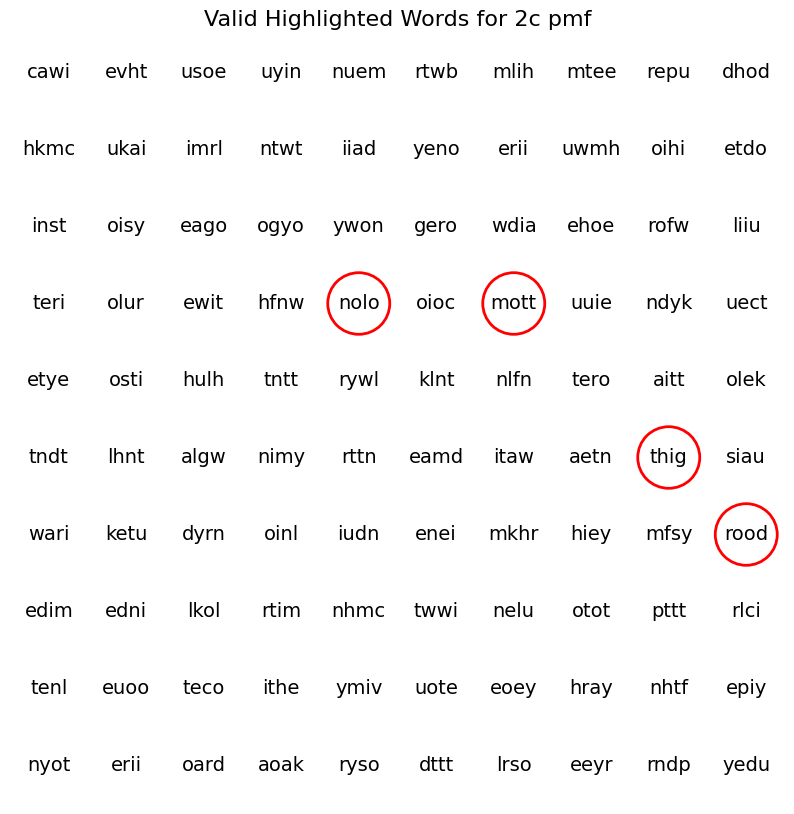

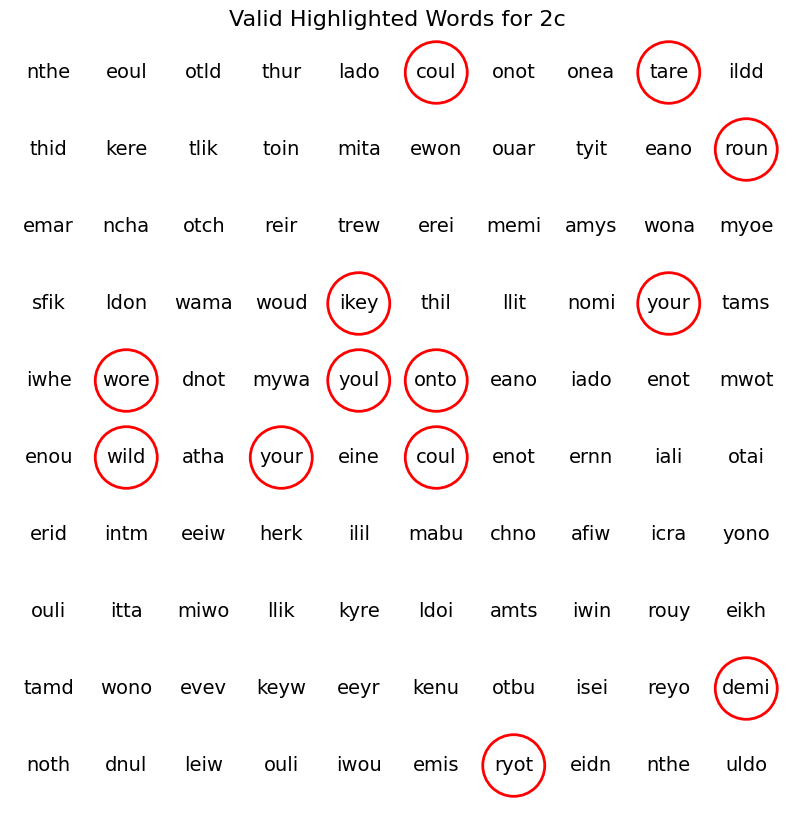

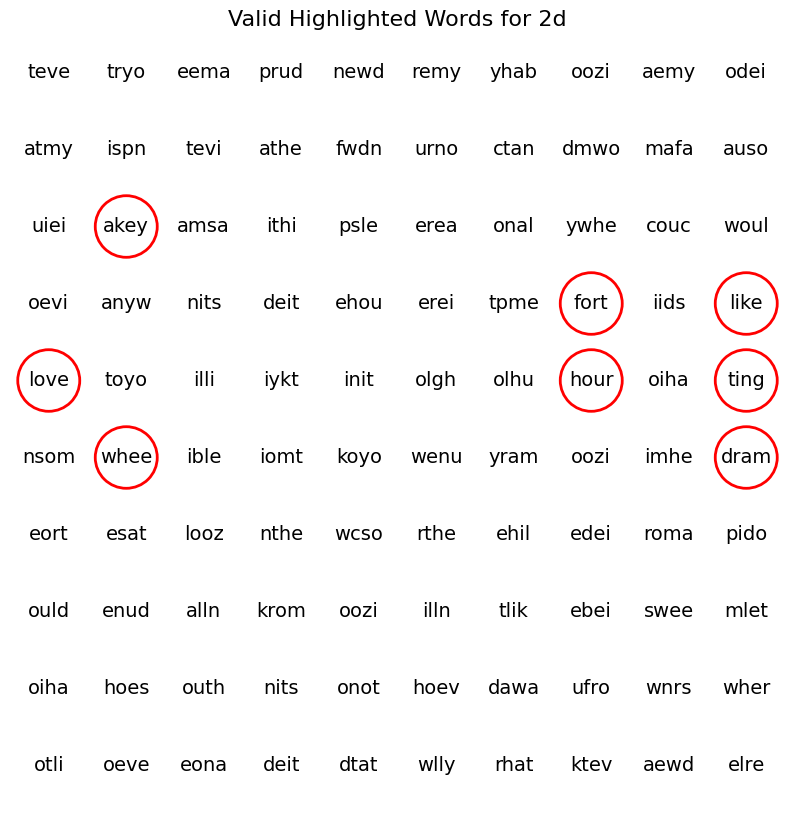

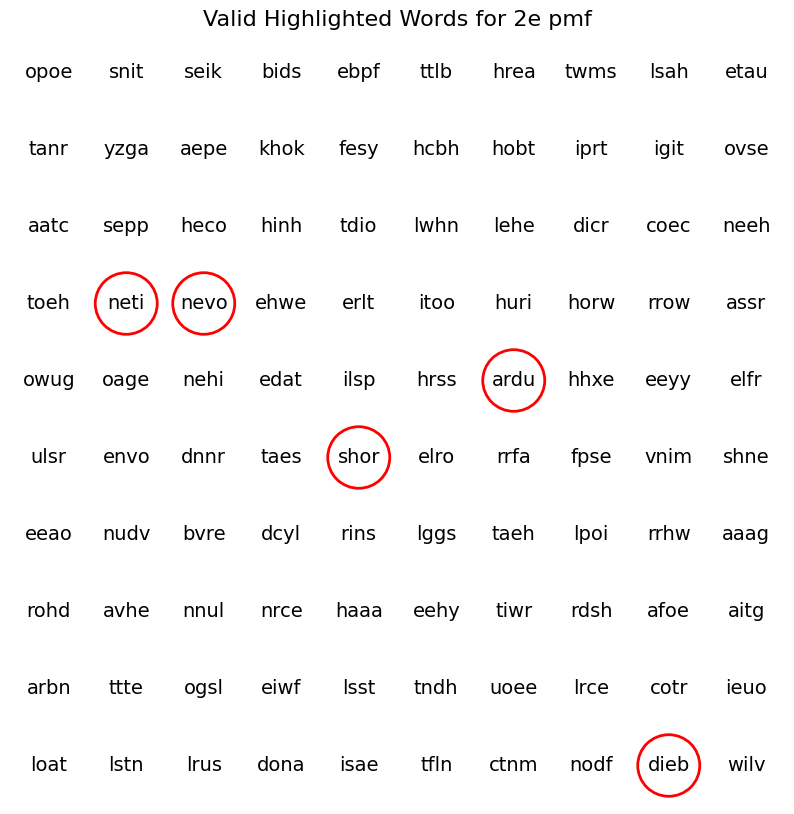

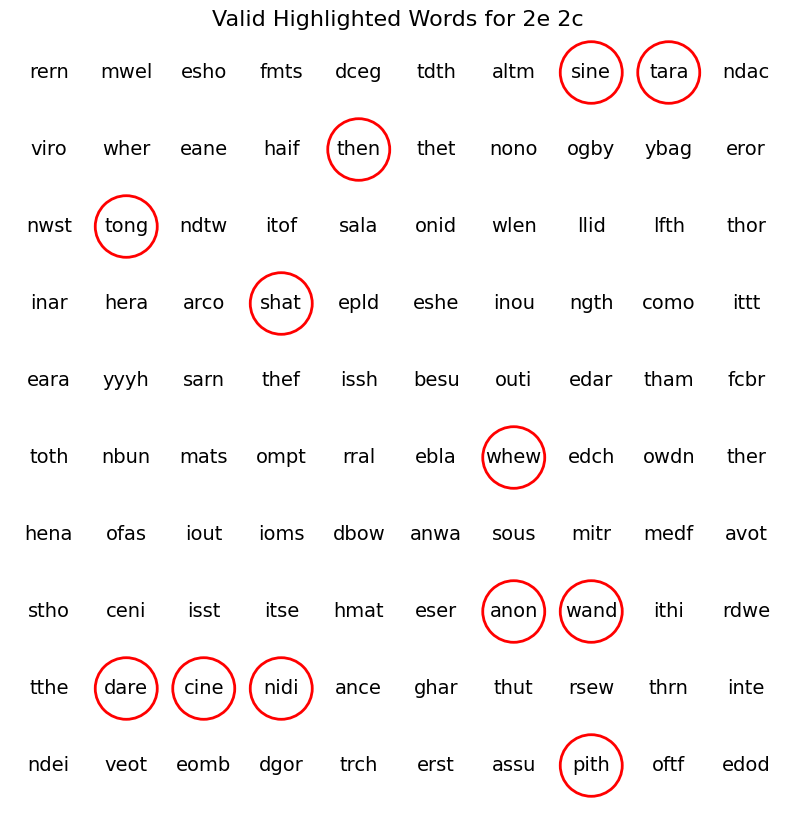

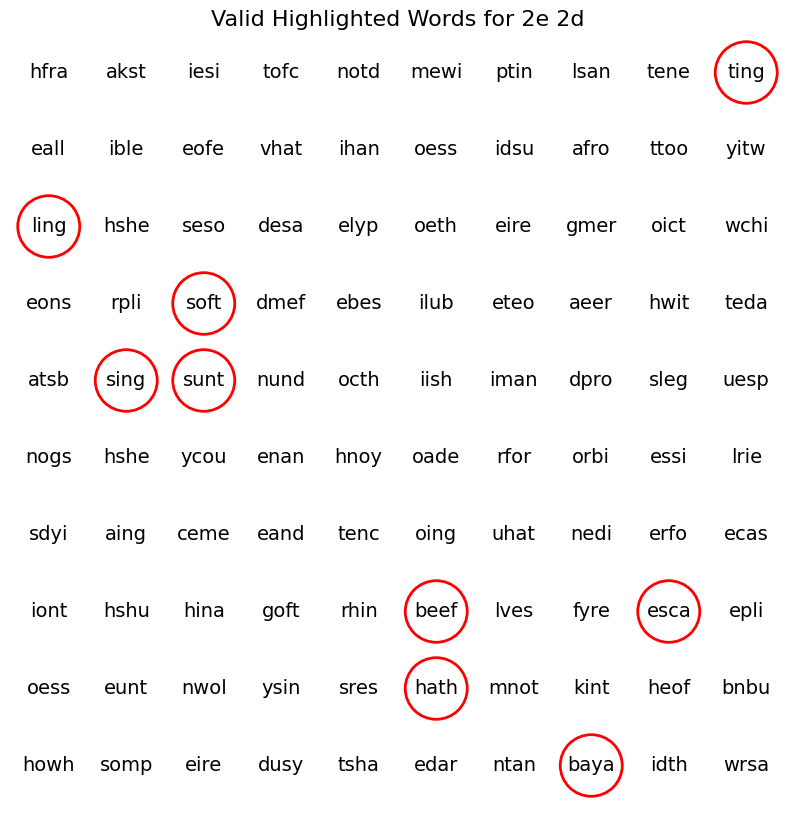

In [42]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from fpdf import FPDF
from nltk.corpus import words

# Load the English words corpus
english_words = set(words.words())

# Function to format and display words in a grid with highlighted valid words
def format_and_highlight_words(words, english_words, name):
    # Identify valid English words
    valid_words = {word for word in words if word in english_words}
    rows, cols = 10, 10
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_axis_off()

    # Add words in grid
    for i in range(rows):
        for j in range(cols):
            word = words[i * cols + j]
            ax.text(j + 0.5, rows - i - 0.5, word, ha="center", va="center", fontsize=14)

            # Highlight valid words
            if word in valid_words:
                circle = Circle((j + 0.5, rows - i - 0.5), 0.4, color='red', fill=False, linewidth=2)
                ax.add_patch(circle)

    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    plt.title(f"Valid Highlighted Words for {name}", fontsize=16)
    plt.show()

    # Save as image
    fig.savefig(f"highlighted_Words_{name}.png")

# Generate the highlighted grid
format_and_highlight_words(words_equiprobable, english_words, "equiprobable")
format_and_highlight_words(words_pmf, english_words, "2c pmf")
format_and_highlight_words(words_2c, english_words, "2c")
format_and_highlight_words(words_2d, english_words, "2d")

format_and_highlight_words(words_2e_pmf, english_words, "2e pmf")
format_and_highlight_words(words_2e_2c, english_words, "2e 2c")
format_and_highlight_words(words_2e_2d, english_words, "2e 2d")